In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gp
import time
plt.style.use('seaborn')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'SimHei'
%matplotlib inline 

plt.rcParams['xtick.direction'] = 'inout'  # x軸刻度 位置
plt.rcParams['xtick.major.size'] = 3.5 # x軸刻度 長度

In [32]:
df = pd.read_csv('台中市交通_1011.csv', engine='python')
df = df.drop(df.columns[0], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40249 entries, 0 to 40248
Data columns (total 12 columns):
年         40249 non-null int64
月         40249 non-null int64
日         40249 non-null int64
時         40249 non-null int64
分         40249 non-null int64
縣市        40249 non-null object
區         40249 non-null object
GPS座標X    38182 non-null float64
GPS座標Y    38182 non-null float64
count     40249 non-null int64
10月       40249 non-null int64
11月       40249 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 3.7+ MB


In [33]:
df.head()

,年,月,日,時,分,縣市,區,GPS座標X,GPS座標Y,count,10月,11月
0,2017,10,1,0,1,臺中市,南屯區,24.132124,120.648291,1,1,0
1,2017,10,1,0,1,臺中市,南屯區,24.132124,120.648291,1,0,1
2,2017,11,1,0,7,臺中市,霧峰區,24.073801,120.663218,1,1,0
3,2017,11,1,0,7,臺中市,霧峰區,24.073801,120.663218,1,0,1
4,2017,10,1,0,5,臺中市,南屯區,24.135295,120.638802,1,1,0


# Map

In [71]:
villages_shp = gp.read_file("mapdata/VILLAGE_MOI_121_1070330.shp") #全台灣村里界圖
taichung_shp = villages_shp.query('COUNTYNAME=="臺中市"') #臺中市村里界圖
taichung_shp.head()

,VILLCODE,COUNTYNAME,TOWNNAME,VILLNAME,VILLENG,COUNTYID,COUNTYCODE,TOWNID,TOWNCODE,NOTE,geometry
30,66000110029,臺中市,大甲區,建興里,Jianxing Vil.,B,66000,B11,66000110,None,"POLYGON ((211953.8593720552 2700835.999980656,..."
31,66000120001,臺中市,清水區,鰲峰里,Aofeng Vil.,B,66000,B12,66000120,None,"POLYGON ((207824.5624888235 2685427.000032167,..."
184,66000120002,臺中市,清水區,靈泉里,Lingquan Vil.,B,66000,B12,66000120,None,"POLYGON ((206884.8828465287 2684199.698836186,..."
185,66000120003,臺中市,清水區,清水里,Qingshui Vil.,B,66000,B12,66000120,None,"POLYGON ((207237.3107313524 2685067.596949181,..."
186,66000120004,臺中市,清水區,文昌里,Wenchang Vil.,B,66000,B12,66000120,None,"POLYGON ((207030.4703489374 2685241.511249905,..."


In [85]:
#a = df.groupby(['區'])['count'].count()
df.groupby(['區']).size()

區
中區      465
北區     2422
北屯區    3595
南區     1676
南屯區    3210
后里區     492
和平區     120
外埔區     241
大安區     104
大甲區     797
大肚區     444
大里區    2878
大雅區    1315
太平區    1979
新社區     131
東勢區     272
東區     1718
梧棲區     670
沙鹿區    1630
清水區     683
潭子區    1131
烏日區    1135
石岡區     140
神岡區     719
西區     2293
西屯區    6275
豐原區    1548
霧峰區    1244
龍井區     922
dtype: int64

In [86]:
dff = pd.DataFrame(a)
dff['區'] = dff.index
dff.head()

,count,區
區,,
中區,465,中區
北區,2422,北區
北屯區,3595,北屯區
南區,1676,南區
南屯區,3210,南屯區


In [87]:
tc = pd.DataFrame({'count' : df.groupby(['區']).size()}).reset_index()

In [89]:
#pd.merge(df1,df2,left_on='lkey',right_on='rkey')
try_shp = pd.merge(taichung_shp, tc, left_on='TOWNNAME', right_on='區')
try_shp = try_shp.drop(['區'], axis=1)
try_shp.head()

,VILLCODE,COUNTYNAME,TOWNNAME,VILLNAME,VILLENG,COUNTYID,COUNTYCODE,TOWNID,TOWNCODE,NOTE,geometry,count
0,66000110029,臺中市,大甲區,建興里,Jianxing Vil.,B,66000,B11,66000110,None,"POLYGON ((211953.8593720552 2700835.999980656,...",797
1,66000110001,臺中市,大甲區,朝陽里,Zhaoyang Vil.,B,66000,B11,66000110,None,"POLYGON ((212318.5395869798 2693453.000670101,...",797
2,66000110002,臺中市,大甲區,大甲里,Dajia Vil.,B,66000,B11,66000110,None,"POLYGON ((212230.3987713201 2693303.010372205,...",797
3,66000110003,臺中市,大甲區,順天里,Shuntian Vil.,B,66000,B11,66000110,None,"POLYGON ((211594.8088072341 2693601.746049465,...",797
4,66000110004,臺中市,大甲區,孔門里,Kongmen Vil.,B,66000,B11,66000110,None,"POLYGON ((212024.0327582744 2693667.445433716,...",797


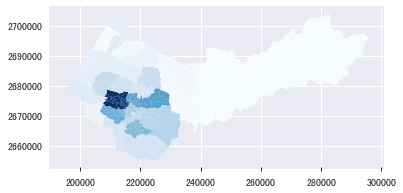

In [90]:
try_shp.plot(
    cmap=plt.cm.Blues, #指定顏色
    column='count' #指定從自身的這個 column 讀取顏色深度
)
plt.show()